## importing all the neccesary libraries 

In [80]:
import pandas as pd
import matplotlib.pylab as plt
import plotly.express as px
import matplotlib
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
import pyarrow
%matplotlib inline 

## Task
The Rain in Australia dataset contains about 10 years of daily weather observations from numerous Australian weather stations. Here's a small sample from the dataset:

In [2]:
weather_df = pd.read_csv('weatherAUS.csv')
weather_df.head(3)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   

   RainTomorrow  
0            No  
1            No  
2            No  

[3 rows x 23 columns]

As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow.

## Linear Regression vs. Logistic Regression
In the previous tutorial, we attempted to predict a person's annual medical charges using linear regression. In this tutorial, we'll use logistic regression, which is better suited for classification problems like predicting whether it will rain tomorrow. Identifying whether a given problem is a classfication or regression problem is an important first step in machine learning.

Classification Problems
Problems where each input must be assigned a discrete category (also called label or class) are known as classification problems.

Here are some examples of classification problems:

Rainfall prediction: Predicting whether it will rain tomorrow using today's weather data (classes are "Will Rain" and "Will Not Rain")

Breast cancer detection: Predicting whether a tumor is "benign" (noncancerous) or "malignant" (cancerous) using information like its radius, texture etc.

Loan Repayment Prediction - Predicting whether applicants will repay a home loan based on factors like age, income, loan amount, no. of children etc.

Handwritten Digit Recognition - Identifying which digit from 0 to 9 a picture of handwritten text represents.
Can you think of some more classification problems?

## Regression Problems
Problems where a continuous numeric value must be predicted for each input are known as regression problems.

Here are some example of regression problems:

Medical Charges Prediction
House Price Prediction
Ocean Temperature Prediction
Weather Temperature Prediction
Can you think of some more regression problems?

EXERCISE: Replicate the steps followed in the previous tutorial with each of the above datasets.

### Linear Regression for Solving Regression Problems

Linear regression is a commonly used technique for solving regression problems. In a linear regression model, the target is modeled as a linear combination (or weighted sum) of input features. The predictions from the model are evaluated using a loss function like the Root Mean Squared Error (RMSE).


Here's a visual summary of how a linear regression model is structured:

<img src="https://i.imgur.com/iTM2s5k.png" width="480">


For a mathematical discussion of linear regression, watch [this YouTube playlist](https://www.youtube.com/watch?v=kHwlB_j7Hkc&list=PLJs7lEb1U5pYnrI0Wn4mzPmppVqwERL_4&index=1)

### Logistic Regression for Solving Classification Problems

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">


The output of the sigmoid function is called a logistic, hence the name _logistic regression_. For a mathematical discussion of logistic regression, sigmoid activation and cross entropy, check out [this YouTube playlist](https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy&index=1). Logistic regression can also be applied to multi-class classification problems, with a few modifications.

### Machine Learning Workflow

Whether we're solving a regression problem using linear regression or a classification problem using logistic regression, the workflow for training a model is exactly the same:

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://i.imgur.com/g32CoIy.png" width="480">


Classification and regression are both supervised machine learning problems, because they use labeled data. Machine learning applied to unlabeled data is known as unsupervised learning ([image source](https://au.mathworks.com/help/stats/machine-learning-in-matlab.html)). 

<img src="https://i.imgur.com/1EMQmAw.png" width="480">


In this tutorial, we'll train a _logistic regression_ model using the Rain in Australia dataset to predict whether or not it will rain at a location tomorrow, using today's data. This is a _binary classification_ problem.

Let's install the `scikit-learn` library which we'll use to train our model.

In [3]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
weather_df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [5]:
weather_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)


In [6]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [7]:
weather_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

## Exploratory Data Analysis and Visualization

Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries. Follow these tutorials to learn how to use these libraries:

- https://jovian.ai/aakashns/python-matplotlib-data-visualization
- https://jovian.ai/aakashns/interactive-visualization-plotly
- https://jovian.ai/aakashns/dataviz-cheatsheet

In [8]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [9]:
weather_df.Location.nunique()

49

In [10]:
px.histogram(weather_df, x = 'Location', title='Location vs. Rainy Days', color='RainToday')

In [11]:
px.histogram(weather_df,
             x= 'Temp3pm',
             title= 'Temperature at 3 pm vs. Rain Tomorrow',
             color = 'RainTomorrow')

In [12]:
px.histogram(weather_df, 
             x= 'RainTomorrow', 
             color = 'RainToday',
             title='Rain Tomorrow vs. Rain Today')

In [13]:
px.scatter(weather_df.sample(2000),
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x = 'Temp3pm',
           y = 'Humidity3pm',
           color='RainTomorrow')

In [14]:
px.histogram(weather_df.sample(2000),
                 title='Rainfall',
                 x='RainToday',
                 color='Rainfall',)

In [15]:
px.scatter(weather_df.sample(1000), 
             x= 'MinTemp', 
             color = 'MaxTemp',
             title='MaxTemp vs. MinTemp')

In [16]:
px.scatter(weather_df.sample(1000),
           title='Temp (9 pm) vs. Temp (3 pm)',
           x = 'Temp3pm',
           color = 'Temp9am'
           )

In [17]:
px.scatter(weather_df.sample(1000),
       x = 'MaxTemp',
       color = 'Rainfall',
       title='MaxTemp vs. Rainfall')

In [18]:
px.box(weather_df.sample(1000),
          x = 'Humidity3pm',
          color = 'RainTomorrow',
          title='Humidity3pm vs. RainTomorrow')

In [19]:
px.scatter(weather_df.sample(1000),
        x = 'Date',
        color= 'Rainfall',
        title= 'Date vs. Temp')

In [20]:
px.scatter(weather_df.sample(2000), 
           title='Min Temp. vs Max Temp.',
           x='MinTemp', 
           y='MaxTemp', 
           color='RainToday')

## (Optional) Working with a Sample

When working with massive datasets containing millions of rows, it's a good idea to work with a sample initially, to quickly set up your model training notebook. If you'd like to work with a sample, just set the value of `use_sample` to `True`.

In [21]:
use_sample = True
sample_fraction = 0.1
if use_sample:
    weather_df = weather_df.sample(frac = sample_fraction).copy()

Make sure to set `use_sample` to `False` and re-run the notebook end-to-end once you're ready to use the entire dataset.

## Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique. 


2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. [Learn more here.](https://www.fast.ai/2017/11/13/validation-sets/)


3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


<img src="https://i.imgur.com/j8eITrK.png" width="480">


As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.


When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the `train_test_split` utility from `scikit-learn`. Learn more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_val_df, test_df = train_test_split(weather_df, test_size= 0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42 )

In [24]:
print('train_df.shape', train_df.shape)
print('val_df.shape', val_df.shape)
print('test_df.shape', test_df.shape)

train_df.shape (8447, 23)
val_df.shape (2816, 23)
test_df.shape (2816, 23)


However, while working with dates, it's often a better idea to separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.

For the current dataset, we can use the Date column in the dataset to create another column for year. We'll pick the last two years for the test set, and one year before it for the validation set.

C:\Users\idree\AppData\Local\Temp\ipykernel_29024\3518803483.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\idree\AppData\Local\Temp\ipykernel_29024\3518803483.py:2: UserWarning:


The palette list has fewer values (4) than needed (11) and will cycle, which may produce an uninterpretable plot.



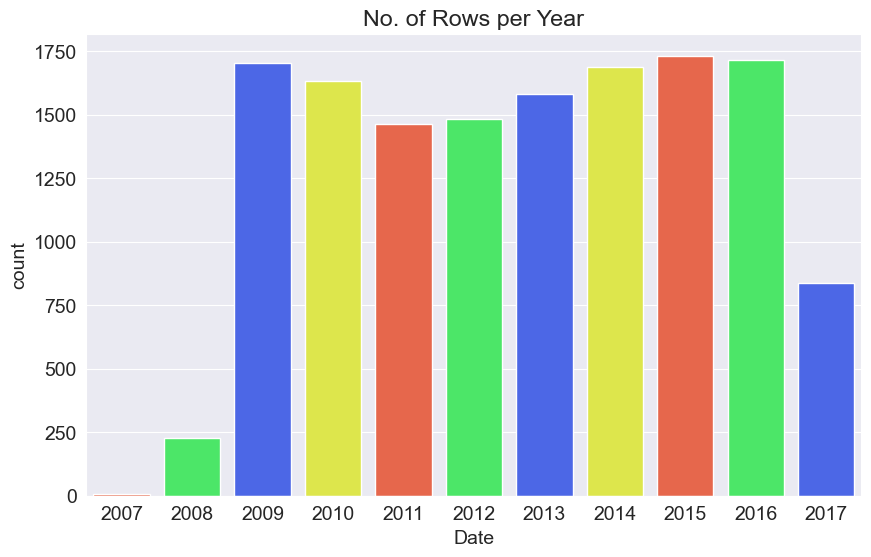

In [25]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(weather_df.Date).dt.year, palette=['#FF5733', '#33FF57', '#3357FF', '#F3FF33']);

In [26]:
year = pd.to_datetime(weather_df.Date).dt.year

train_df = weather_df[year < 2015]
val_df = weather_df[year == 2015]
test_df = weather_df[year > 2015]

In [27]:
print('train_df.shape', train_df.shape)
print('val_df.shape', val_df.shape)
print('test_df.shape', test_df.shape)

train_df.shape (9791, 23)
val_df.shape (1733, 23)
test_df.shape (2555, 23)


While not a perfect 60-20-20 split, we have ensured that the test validation and test sets both contain data for all 12 months of the year.

In [28]:
train_df

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
116112  2013-05-01    PearceRAAF     12.6     27.8       0.0          NaN   
1796    2014-01-29        Albury     18.8     40.6       0.0          NaN   
134599  2013-06-15    Launceston      7.1     13.2       0.0          NaN   
137820  2013-12-13  AliceSprings     14.2     34.7       0.0         12.0   
61802   2010-09-13          Sale      4.8     15.4       0.0          3.0   
...            ...           ...      ...      ...       ...          ...   
119326  2013-11-22  PerthAirport     19.9     32.0       0.0          9.4   
94569   2012-07-12    Townsville     20.2     26.1       2.8          2.4   
56493   2012-10-22      Ballarat      3.6     15.9       0.0          NaN   
102948  2010-01-31     Nuriootpa     15.4     35.0       0.0         10.6   
144250  2014-03-04         Uluru     19.3     36.5       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
116112       1.3         NNW           37.0          N  ...        70.0   
1796         NaN         NNW           39.0          E  ...        51.0   
134599       NaN         SSE           54.0         SE  ...        79.0   
137820      13.4           S           48.0          E  ...        13.0   
61802        7.1           W           50.0          W  ...        61.0   
...          ...         ...            ...        ...  ...         ...   
119326      10.7         ENE           48.0         NE  ...        35.0   
94569        1.7          NE           28.0          S  ...        89.0   
56493        NaN         ESE           35.0        SSE  ...        88.0   
102948      12.6           W           44.0         NE  ...        27.0   
144250       NaN          SE           41.0          E  ...        28.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
116112         39.0       1013.5       1010.0       8.0       8.0     18.9   
1796           18.0       1015.2       1011.1       NaN       NaN     26.7   
134599         62.0       1020.8       1022.2       NaN       NaN      9.6   
137820          8.0       1013.5       1009.7       1.0       1.0     27.9   
61802          62.0       1013.1       1013.7       7.0       4.0     13.8   
...             ...          ...          ...       ...       ...      ...   
119326         56.0       1006.1       1005.6       2.0       2.0     28.0   
94569          84.0       1016.5       1013.1       7.0       7.0     22.3   
56493          49.0       1023.3       1023.2       NaN       NaN      8.2   
102948         21.0       1008.2       1008.7       6.0       3.0     28.4   
144250         15.0       1016.2       1011.9       NaN       NaN     28.1   

        Temp3pm  RainToday  RainTomorrow  
116112     26.4         No           Yes  
1796       39.3         No            No  
134599     12.2         No            No  
137820     33.4         No            No  
61802      14.6         No            No  
...         ...        ...           ...  
119326     26.6         No            No  
94569      24.4        Yes            No  
56493      15.3         No            No  
102948     31.3         No            No  
144250     35.9         No            No  

[9791 rows x 23 columns]

In [29]:
val_df

Date    Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
77198   2015-04-27    Portland      9.4     14.0       1.8          1.2   
26541   2015-10-09     Penrith     15.8     26.7       0.0          NaN   
116933  2015-07-31  PearceRAAF     15.9     20.2      20.4          NaN   
129185  2015-09-12     Walpole      9.8     13.9      13.6          NaN   
104902  2015-09-05   Nuriootpa      1.0     16.2       0.1          0.6   
...            ...         ...      ...      ...       ...          ...   
45037   2015-12-24  Wollongong     16.8     23.3       0.6          NaN   
135327  2015-06-13  Launceston      0.6     12.4       0.2          NaN   
26520   2015-09-18     Penrith     12.8     20.8       0.2          NaN   
29594   2015-11-22    Richmond     16.3     22.3       0.0          NaN   
2445    2015-11-09      Albury     12.0     29.6       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
77198        6.3         WSW           31.0        SSW  ...        87.0   
26541        NaN           E           22.0        NNW  ...        73.0   
116933       0.0          NE           39.0          N  ...        95.0   
129185       NaN         SSW           43.0         NW  ...        99.0   
104902       9.5           W           26.0        ENE  ...        73.0   
...          ...         ...            ...        ...  ...         ...   
45037        NaN         ESE           33.0          S  ...        83.0   
135327       NaN         NNW           20.0        NaN  ...        97.0   
26520        NaN         SSE           26.0        SSW  ...        56.0   
29594        NaN           E           26.0        NaN  ...        69.0   
2445         NaN           W           30.0         SE  ...        65.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
77198          88.0       1025.2       1025.3       8.0       7.0     11.6   
26541          41.0          NaN          NaN       NaN       NaN     17.8   
116933         77.0       1013.6       1010.6       7.0       7.0     16.4   
129185         87.0       1011.7       1012.2       NaN       NaN     10.9   
104902         51.0       1025.4       1020.7       2.0       NaN      9.5   
...             ...          ...          ...       ...       ...      ...   
45037          64.0       1021.0       1019.6       8.0       NaN     19.3   
135327         69.0          NaN          NaN       8.0       NaN      3.8   
26520          44.0          NaN          NaN       NaN       NaN     16.4   
29594          62.0       1019.6       1016.4       8.0       8.0     19.4   
2445           37.0       1021.1       1015.7       NaN       NaN     19.0   

        Temp3pm  RainToday  RainTomorrow  
77198      12.2        Yes           Yes  
26541      25.4         No            No  
116933     19.7        Yes           Yes  
129185     11.1        Yes           Yes  
104902     16.1         No            No  
...         ...        ...           ...  
45037      22.2         No            No  
135327     12.0         No            No  
26520      18.8         No           Yes  
29594      21.0         No            No  
2445       27.4         No            No  

[1733 rows x 23 columns]

In [30]:
train_df

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
116112  2013-05-01    PearceRAAF     12.6     27.8       0.0          NaN   
1796    2014-01-29        Albury     18.8     40.6       0.0          NaN   
134599  2013-06-15    Launceston      7.1     13.2       0.0          NaN   
137820  2013-12-13  AliceSprings     14.2     34.7       0.0         12.0   
61802   2010-09-13          Sale      4.8     15.4       0.0          3.0   
...            ...           ...      ...      ...       ...          ...   
119326  2013-11-22  PerthAirport     19.9     32.0       0.0          9.4   
94569   2012-07-12    Townsville     20.2     26.1       2.8          2.4   
56493   2012-10-22      Ballarat      3.6     15.9       0.0          NaN   
102948  2010-01-31     Nuriootpa     15.4     35.0       0.0         10.6   
144250  2014-03-04         Uluru     19.3     36.5       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
116112       1.3         NNW           37.0          N  ...        70.0   
1796         NaN         NNW           39.0          E  ...        51.0   
134599       NaN         SSE           54.0         SE  ...        79.0   
137820      13.4           S           48.0          E  ...        13.0   
61802        7.1           W           50.0          W  ...        61.0   
...          ...         ...            ...        ...  ...         ...   
119326      10.7         ENE           48.0         NE  ...        35.0   
94569        1.7          NE           28.0          S  ...        89.0   
56493        NaN         ESE           35.0        SSE  ...        88.0   
102948      12.6           W           44.0         NE  ...        27.0   
144250       NaN          SE           41.0          E  ...        28.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
116112         39.0       1013.5       1010.0       8.0       8.0     18.9   
1796           18.0       1015.2       1011.1       NaN       NaN     26.7   
134599         62.0       1020.8       1022.2       NaN       NaN      9.6   
137820          8.0       1013.5       1009.7       1.0       1.0     27.9   
61802          62.0       1013.1       1013.7       7.0       4.0     13.8   
...             ...          ...          ...       ...       ...      ...   
119326         56.0       1006.1       1005.6       2.0       2.0     28.0   
94569          84.0       1016.5       1013.1       7.0       7.0     22.3   
56493          49.0       1023.3       1023.2       NaN       NaN      8.2   
102948         21.0       1008.2       1008.7       6.0       3.0     28.4   
144250         15.0       1016.2       1011.9       NaN       NaN     28.1   

        Temp3pm  RainToday  RainTomorrow  
116112     26.4         No           Yes  
1796       39.3         No            No  
134599     12.2         No            No  
137820     33.4         No            No  
61802      14.6         No            No  
...         ...        ...           ...  
119326     26.6         No            No  
94569      24.4        Yes            No  
56493      15.3         No            No  
102948     31.3         No            No  
144250     35.9         No            No  

[9791 rows x 23 columns]

## Identifying Input and Target Columns

Often, not all the columns in a dataset are useful for training a model. In the current dataset, we can ignore the `Date` column, since we only want to weather conditions to make a prediction about whether it will rain the next day.

Let's create a list of input columns, and also identify the target column.

In [31]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [32]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [33]:
target_col

'RainTomorrow'

In [34]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [35]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [36]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [37]:
train_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
116112    PearceRAAF     12.6     27.8       0.0          NaN       1.3   
1796          Albury     18.8     40.6       0.0          NaN       NaN   
134599    Launceston      7.1     13.2       0.0          NaN       NaN   
137820  AliceSprings     14.2     34.7       0.0         12.0      13.4   
61802           Sale      4.8     15.4       0.0          3.0       7.1   
...              ...      ...      ...       ...          ...       ...   
119326  PerthAirport     19.9     32.0       0.0          9.4      10.7   
94569     Townsville     20.2     26.1       2.8          2.4       1.7   
56493       Ballarat      3.6     15.9       0.0          NaN       NaN   
102948     Nuriootpa     15.4     35.0       0.0         10.6      12.6   
144250         Uluru     19.3     36.5       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
116112         NNW           37.0          N        NNW  ...          24.0   
1796           NNW           39.0          E        NNW  ...          13.0   
134599         SSE           54.0         SE        SSE  ...          31.0   
137820           S           48.0          E          S  ...          20.0   
61802            W           50.0          W          W  ...          35.0   
...            ...            ...        ...        ...  ...           ...   
119326         ENE           48.0         NE          W  ...          22.0   
94569           NE           28.0          S         NE  ...          13.0   
56493          ESE           35.0        SSE          E  ...          20.0   
102948           W           44.0         NE          W  ...          30.0   
144250          SE           41.0          E          S  ...          17.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
116112         70.0         39.0       1013.5       1010.0       8.0   
1796           51.0         18.0       1015.2       1011.1       NaN   
134599         79.0         62.0       1020.8       1022.2       NaN   
137820         13.0          8.0       1013.5       1009.7       1.0   
61802          61.0         62.0       1013.1       1013.7       7.0   
...             ...          ...          ...          ...       ...   
119326         35.0         56.0       1006.1       1005.6       2.0   
94569          89.0         84.0       1016.5       1013.1       7.0   
56493          88.0         49.0       1023.3       1023.2       NaN   
102948         27.0         21.0       1008.2       1008.7       6.0   
144250         28.0         15.0       1016.2       1011.9       NaN   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
116112       8.0     18.9     26.4         No  
1796         NaN     26.7     39.3         No  
134599       NaN      9.6     12.2         No  
137820       1.0     27.9     33.4         No  
61802        4.0     13.8     14.6         No  
...          ...      ...      ...        ...  
119326       2.0     28.0     26.6         No  
94569        7.0     22.3     24.4        Yes  
56493        NaN      8.2     15.3         No  
102948       3.0     28.4     31.3         No  
144250       NaN     28.1     35.9         No  

[9791 rows x 21 columns]

In [38]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [39]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


Let's view some statistics for the numeric columns.

In [40]:
train_inputs[numeric_cols].describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  9748.000000  9766.000000  9791.000000  6188.000000  5802.000000   
mean     11.863911    22.858519     2.425605     5.281432     7.543554   
std       6.389218     6.984556     8.733806     3.911188     3.765999   
min      -7.100000    -3.100000     0.000000     0.000000     0.000000   
25%       7.300000    17.700000     0.000000     2.600000     4.800000   
50%      11.600000    22.200000     0.000000     4.600000     8.300000   
75%      16.500000    27.800000     0.800000     7.200000    10.500000   
max      31.400000    45.800000   236.800000    59.800000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    9085.000000   9691.000000   9676.000000  9690.000000  9681.000000   
mean       40.226417     14.037973     18.755788    68.913106    51.502118   
std        14.021777      9.093801      8.948304    18.976654    20.742738   
min         7.000000      0.000000      0.000000     0.000000     0.000000   
25%        31.000000      7.000000     13.000000    57.000000    37.000000   
50%        39.000000     13.000000     19.000000    70.000000    52.000000   
75%        48.000000     19.000000     24.000000    83.000000    66.000000   
max       130.000000     87.000000     69.000000   100.000000   100.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  8887.000000  8891.000000  6336.000000  6229.000000  9738.000000   
mean   1017.655654  1015.234428     4.324021     4.393803    16.651232   
std       7.141386     7.083201     2.882650     2.692463     6.446889   
min     985.800000   982.900000     0.000000     0.000000    -5.500000   
25%    1012.950000  1010.600000     1.000000     2.000000    12.000000   
50%    1017.700000  1015.300000     5.000000     5.000000    16.300000   
75%    1022.400000  1020.000000     7.000000     7.000000    21.200000   
max    1040.400000  1037.900000     8.000000     8.000000    38.900000   

           Temp3pm  
count  9741.000000  
mean     21.397464  
std       6.833216  
min      -3.700000  
25%      16.400000  
50%      20.800000  
75%      26.000000  
max      44.700000

In [41]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

## Imputing Missing Numeric Data

Machine learning models can't work with missing numerical data. The process of filling missing values is called imputation.

<img src="https://i.imgur.com/W7cfyOp.png" width="480">

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`.

In [42]:
from sklearn.impute import SimpleImputer

In [43]:
imputer = SimpleImputer(strategy= 'mean')

In [44]:
weather_df[numeric_cols].isna().sum()

MinTemp            53
MaxTemp            41
Rainfall            0
Evaporation      5970
Sunshine         6720
WindGustSpeed     952
WindSpeed9am      115
WindSpeed3pm      285
Humidity9am       139
Humidity3pm       371
Pressure9am      1375
Pressure3pm      1375
Cloud9am         5236
Cloud3pm         5591
Temp9am            57
Temp3pm           281
dtype: int64

In [45]:
train_df[numeric_cols].isna().sum()

MinTemp            43
MaxTemp            25
Rainfall            0
Evaporation      3603
Sunshine         3989
WindGustSpeed     706
WindSpeed9am      100
WindSpeed3pm      115
Humidity9am       101
Humidity3pm       110
Pressure9am       904
Pressure3pm       900
Cloud9am         3455
Cloud3pm         3562
Temp9am            53
Temp3pm            50
dtype: int64

In [46]:
val_df[numeric_cols].isna().sum()

MinTemp            1
MaxTemp            3
Rainfall           0
Evaporation      832
Sunshine         926
WindGustSpeed     94
WindSpeed9am       7
WindSpeed3pm      44
Humidity9am       16
Humidity3pm       73
Pressure9am      186
Pressure3pm      188
Cloud9am         648
Cloud3pm         689
Temp9am            0
Temp3pm           57
dtype: int64

In [47]:
test_df[numeric_cols].isna().sum()

MinTemp             9
MaxTemp            13
Rainfall            0
Evaporation      1535
Sunshine         1805
WindGustSpeed     152
WindSpeed9am        8
WindSpeed3pm      126
Humidity9am        22
Humidity3pm       188
Pressure9am       285
Pressure3pm       287
Cloud9am         1133
Cloud3pm         1340
Temp9am             4
Temp3pm           174
dtype: int64

The first step in imputation is to `fit` the imputer to the data i.e. compute the chosen statistic (e.g. mean) for each column in the dataset. 

In [48]:
imputer.fit(weather_df[numeric_cols])

SimpleImputer()

After calling `fit`, the computed statistic for each column is stored in the `statistics_` property of `imputer`.

In [49]:
list(imputer.statistics_)

[np.float64(12.099251390275203),
 np.float64(23.10053426414019),
 np.float64(2.3813054904467643),
 np.float64(5.455111604390184),
 np.float64(7.558391085745345),
 np.float64(39.999009674716234),
 np.float64(13.999570323689488),
 np.float64(18.650717703349283),
 np.float64(69.11958393113343),
 np.float64(51.58936387510943),
 np.float64(1017.7627440176321),
 np.float64(1015.3587688916878),
 np.float64(4.443966979531833),
 np.float64(4.485744580584354),
 np.float64(16.861988304093565),
 np.float64(21.568705609508623)]

The missing values in the training, test and validation sets can now be filled in using the `transform` method of `imputer`.

In [50]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

The missing values are now filled in with the mean of each column.

In [51]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

> **EXERCISE**: Apply some other imputation techniques and observe how they change the results of the model. You can learn more about other imputation techniques here: https://scikit-learn.org/stable/modules/impute.html

## Scaling Numeric Features

Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.

In [53]:
weather_df[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall  Evaporation     Sunshine  \
count  14026.000000  14038.000000  14079.000000  8109.000000  7359.000000   
mean      12.099251     23.100534      2.381305     5.455112     7.558391   
std        6.446322      7.095033      8.442014     4.088623     3.753120   
min       -7.100000     -3.100000      0.000000     0.000000     0.000000   
25%        7.400000     17.800000      0.000000     2.600000     4.800000   
50%       11.900000     22.400000      0.000000     4.800000     8.400000   
75%       16.800000     28.100000      0.800000     7.400000    10.500000   
max       31.400000     47.300000    236.800000    68.800000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count    13127.00000  13964.000000  13794.000000  13940.000000  13708.000000   
mean        39.99901     13.999570     18.650718     69.119584     51.589364   
std         13.82176      8.990689      8.867599     19.040850     20.811608   
min          7.00000      0.000000      0.000000      0.000000      0.000000   
25%         31.00000      7.000000     13.000000     57.000000     37.000000   
50%         39.00000     13.000000     19.000000     70.000000     52.000000   
75%         48.00000     19.000000     24.000000     83.000000     66.000000   
max        135.00000     87.000000     74.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm     Cloud9am     Cloud3pm       Temp9am  \
count  12704.000000  12704.000000  8843.000000  8488.000000  14022.000000   
mean    1017.762744   1015.358769     4.443967     4.485745     16.861988   
std        7.127442      7.073894     2.895429     2.719438      6.504428   
min      985.800000    982.200000     0.000000     0.000000     -5.500000   
25%     1013.100000   1010.600000     1.000000     2.000000     12.100000   
50%     1017.800000   1015.400000     5.000000     5.000000     16.600000   
75%     1022.500000   1020.100000     7.000000     7.000000     21.500000   
max     1040.400000   1037.900000     8.000000     8.000000     38.900000   

            Temp3pm  
count  13798.000000  
mean      21.568706  
std        6.918160  
min       -3.700000  
25%       16.500000  
50%       21.000000  
75%       26.300000  
max       46.700000

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler()

In [56]:
scaler.fit(weather_df[numeric_cols])

MinMaxScaler()

In [57]:
print('Minimum: ')
list(scaler.data_min_)

Minimum: 


[np.float64(-7.1),
 np.float64(-3.1),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(7.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(985.8),
 np.float64(982.2),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(-5.5),
 np.float64(-3.7)]

In [58]:
print('Maximum: ')
list(scaler.data_max_)

Maximum: 


[np.float64(31.4),
 np.float64(47.3),
 np.float64(236.8),
 np.float64(68.8),
 np.float64(13.9),
 np.float64(135.0),
 np.float64(87.0),
 np.float64(74.0),
 np.float64(100.0),
 np.float64(100.0),
 np.float64(1040.4),
 np.float64(1037.9),
 np.float64(8.0),
 np.float64(8.0),
 np.float64(38.9),
 np.float64(46.7)]

In [59]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [60]:
train_inputs[numeric_cols].describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  9791.000000  9791.000000  9791.000000  9791.000000  9791.000000   
mean      0.492596     0.515062     0.010243     0.077694     0.543137   
std       0.165589     0.138406     0.036883     0.045209     0.208558   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.374026     0.412698     0.000000     0.055233     0.532374   
50%       0.488312     0.501984     0.000000     0.079289     0.543769   
75%       0.612987     0.611111     0.003378     0.081395     0.654676   
max       1.000000     0.970238     1.000000     0.869186     1.000000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    9791.000000   9791.000000   9791.000000  9791.000000  9791.000000   
mean        0.259453      0.161352      0.253440     0.689152     0.515031   
std         0.105522      0.103991      0.120211     0.188785     0.206259   
min         0.000000      0.000000      0.000000     0.000000     0.000000   
25%         0.187500      0.080460      0.175676     0.570000     0.370000   
50%         0.250000      0.149425      0.252037     0.700000     0.515894   
75%         0.304688      0.218391      0.324324     0.830000     0.650000   
max         0.960938      1.000000      0.932432     1.000000     1.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  9791.000000  9791.000000  9791.000000  9791.000000  9791.000000   
mean      0.583618     0.593283     0.545793     0.553406     0.498927   
std       0.124611     0.121183     0.289946     0.268494     0.144807   
min       0.000000     0.012567     0.000000     0.000000     0.000000   
25%       0.507326     0.518851     0.375000     0.375000     0.394144   
50%       0.585398     0.595310     0.555496     0.560718     0.493243   
75%       0.661172     0.669659     0.750000     0.750000     0.601351   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           Temp3pm  
count  9791.000000  
mean      0.497983  
std       0.135233  
min       0.000000  
25%       0.398810  
50%       0.486111  
75%       0.589286  
max       0.960317

Learn more about scaling techniques here: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

## Encoding Categorical Data

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column. 

In [61]:
weather_df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [62]:
from sklearn.preprocessing import OneHotEncoder

In [70]:
encoder = OneHotEncoder(sparse_output= False, handle_unknown='ignore')

In [71]:
encoder.fit(weather_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [72]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

The encoder has created a list of categories for each of the categorical columns in the dataset. 

We can generate column names for each individual category using `get_feature_names_out
`.

In [73]:
encode_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encode_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [76]:
train_inputs[encode_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encode_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encode_cols] = encoder.transform(test_inputs[categorical_cols])

In [77]:
pd.set_option('display.max_columns', None)

In [78]:
test_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
120562  PerthAirport  0.527273  0.626984  0.000000     0.095930  0.755396   
126712    SalmonGums  0.563636  0.783730  0.000000     0.079289  0.543769   
70080      Melbourne  0.509091  0.371032  0.001689     0.052326  0.323741   
14699          Moree  0.361039  0.488095  0.000000     0.162791  0.543769   
51702    Tuggeranong  0.189610  0.313492  0.004223     0.079289  0.543769   
...              ...       ...       ...       ...          ...       ...   
138757  AliceSprings  0.316883  0.496032  0.000000     0.043605  0.543769   
108500       Woomera  0.545455  0.646825  0.000000     0.081395  0.543769   
123445         Perth  0.431169  0.420635  0.001689     0.029070  0.280576   
2801          Albury  0.566234  0.543651  0.000000     0.079289  0.543769   
74548           Nhil  0.548052  0.674603  0.000000     0.079289  0.543769   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
120562           E       0.250000         NE        WSW      0.218391   
126712         WSW       0.390625          N        WNW      0.218391   
70080            N       0.265625        WSW        SSW      0.068966   
14699            E       0.179688        ESE         SE      0.103448   
51702            W       0.250000         NE        WNW      0.080460   
...            ...            ...        ...        ...           ...   
138757         NNE       0.164062        NNE        NNW      0.229885   
108500           S       0.164062        ESE        WSW      0.229885   
123445         ENE       0.117188        ENE        ENE      0.080460   
2801             W       0.484375          N          N      0.321839   
74548          NNE       0.281250         NE        NNE      0.172414   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
120562      0.270270         0.35         0.30     0.565934     0.599641   
126712      0.054054         0.32         0.19     0.585398     0.595310   
70080       0.202703         0.77         0.62     0.675824     0.727110   
14699       0.121622         0.67         0.43     0.890110     0.883303   
51702       0.148649         0.77         0.51     0.553114     0.640934   
...              ...          ...          ...          ...          ...   
138757      0.121622         0.48         0.23     0.663004     0.639138   
108500      0.081081         0.48         0.13     0.598901     0.603232   
123445      0.081081         0.68         0.48     0.573260     0.563734   
2801        0.270270         0.64         0.68     0.368132     0.382406   
74548       0.256757         0.32         0.22     0.620879     0.594255   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
120562  0.000000  0.000000  0.596847  0.601190        No                0.0   
126712  0.555496  0.560718  0.745495  0.793651        No                0.0   
70080   0.875000  0.500000  0.430180  0.355159        No                0.0   
14699   0.555496  0.560718  0.434685  0.494048        No                0.0   
51702   0.555496  0.560718  0.259009  0.311508        No                0.0   
...          ...       ...       ...       ...       ...                ...   
138757  0.875000  0.125000  0.369369  0.496032        No                0.0   
108500  0.125000  0.560718  0.590090  0.644841        No                0.0   
123445  0.625000  0.250000  0.405405  0.416667        No                0.0   
2801    0.125000  1.000000  0.617117  0.482143        No                0.0   
74548   0.555496  0.560718  0.574324  0.670635        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
120562              0.0              0.0                    0.0   
126712              0.0              0.0                    0.0   
70080               0.0              0.0                    0.0   
14699               0.0              0.0                    0.0   
51702        

## Saving Processed Data to Disk

It can be useful to save processed data to disk, especially for really large datasets, to avoid repeating the preprocessing steps every time you start the Jupyter notebook. The parquet format is a fast and efficient format for saving and loading Pandas dataframes.

In [79]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (9791, 123)
train_targets: (9791,)
val_inputs: (1733, 123)
val_targets: (1733,)
test_inputs: (2555, 123)
test_targets: (2555,)


In [81]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [82]:
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

CPU times: total: 15.6 ms
Wall time: 47.4 ms


In [83]:
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

CPU times: total: 62.5 ms
Wall time: 758 ms


## Training a Logistic Regression Model

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">

To train a logistic regression model, we can use the `LogisticRegression` class from Scikit-learn.

In [89]:
model = LogisticRegression(solver='liblinear', tol=0.0001, max_iter= 100)

In [94]:

model.fit(train_inputs[numeric_cols + encode_cols], train_targets)

LogisticRegression(solver='liblinear')

`model.fit` uses the following workflow for training the model ([source](https://www.deepnetts.com/blog/from-basic-machine-learning-to-deep-learning-in-5-minutes.html)):

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://i.imgur.com/g32CoIy.png" width="480">

For a mathematical discussion of logistic regression, sigmoid activation and cross entropy, check out [this YouTube playlist](https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy&index=1). Logistic regression can also be applied to multi-class classification problems, with a few modifications.

In [95]:
print(numeric_cols + encode_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [96]:
print(model.coef_.tolist())

[[0.687977793001433, -0.33312442423691513, 1.7842277624528706, 0.4174702129095038, -1.6570852227440371, 5.863039076857281, -1.0458067552288353, -1.2075999625816738, 0.37375590607388604, 5.364379231790883, 0.9815879189959024, -4.489094767463362, -0.11737697224221434, 1.211345363922096, 0.009550738949315424, -0.09602056673180404, 0.18193511838644275, -0.2604631627011577, 0.11879661703048304, -0.4160318415305884, 0.48927670609461993, -0.6202407917600347, -0.23286295243107274, 0.6187812639016044, 0.32374555469783517, -0.013952116746568901, 0.45570387003313023, 0.026533547797310503, 0.006160920239387003, -0.3862571756073663, 0.11450788102666813, -0.817684657900674, -0.18849753555002702, -0.36412596721042434, -0.08155296065093051, -0.4710164245320354, -0.04056201241974023, -0.4444683409151661, -0.08941797415212137, -0.5762756933010874, -0.19522808481346055, -0.07599229372105931, -0.3005513677264219, -0.3528621219929874, -0.2163040853891943, 0.30069496094660025, 0.36237681414164, 0.7533092707

In [97]:
print(model.intercept_)

[-2.11618533]
